In [ ]:
!wget https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz

--2020-09-02 14:11:20--  https://www.cis.fordham.edu/wisdm/includes/datasets/latest/WISDM_ar_latest.tar.gz
Resolving www.cis.fordham.edu (www.cis.fordham.edu)... 150.108.68.29
Connecting to www.cis.fordham.edu (www.cis.fordham.edu)|150.108.68.29|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11404612 (11M) [application/x-gzip]
Saving to: ‘WISDM_ar_latest.tar.gz’

WISDM_ar_latest.tar 100%[===================>]  10.88M  5.19MB/s    in 2.1s    

2020-09-02 14:11:23 (5.19 MB/s) - ‘WISDM_ar_latest.tar.gz’ saved [11404612/11404612]



In [ ]:
import os
import tarfile

In [ ]:
with tarfile.open('/content/WISDM_ar_latest.tar.gz', 'r:gz') as tar:
    tar.extractall()

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
file = open('/content/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()
preprocessedList = []
for i, line in enumerate(lines):
  try:
    line = line.split(',')
    last = line[5].split(';')[0]
    last = last.strip()
    if last == '':
      break;
    temp = [line[0],line[1],line[2],line[3],line[4],last]
    preprocessedList.append(temp)
  except:
    print('Error in line: ',i)

Error in line:  281873
Error in line:  281874
Error in line:  281875


In [ ]:
preprocessedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [ ]:
columns = ['user','activity','time','x','y','z']

In [ ]:
data = pd.DataFrame(data = preprocessedList, columns = columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [ ]:
data.shape

(343416, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user      343416 non-null  object
 1   activity  343416 non-null  object
 2   time      343416 non-null  object
 3   x         343416 non-null  object
 4   y         343416 non-null  object
 5   z         343416 non-null  object
dtypes: object(6)
memory usage: 15.7+ MB


In [ ]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [ ]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


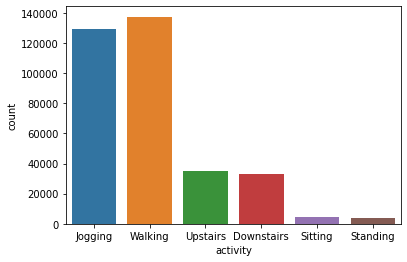

In [ ]:
import seaborn as sns
sns.countplot(data['activity'])
plt.show()

In [ ]:
activities = data['activity'].value_counts().index
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

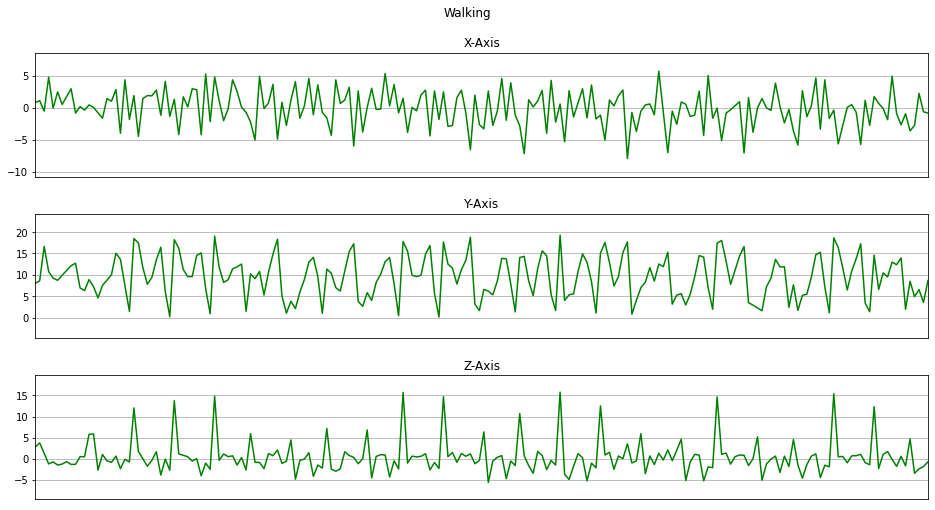

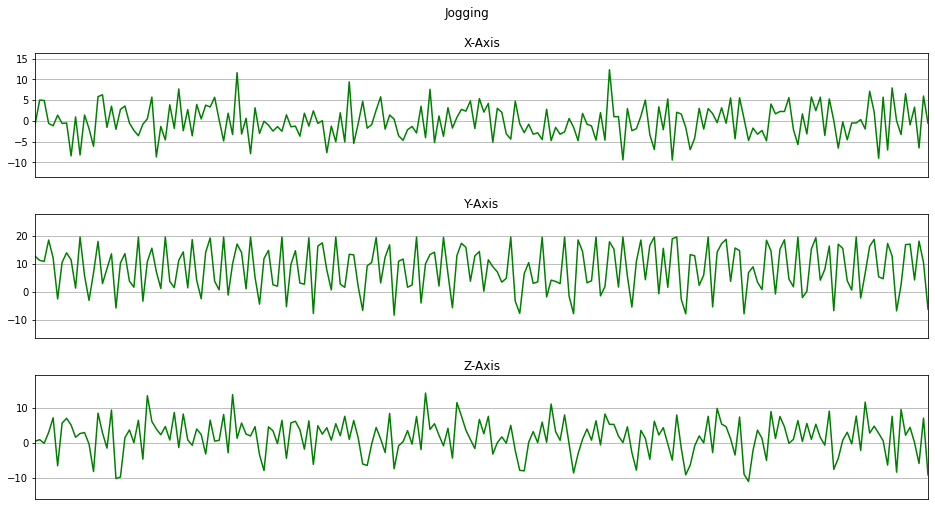

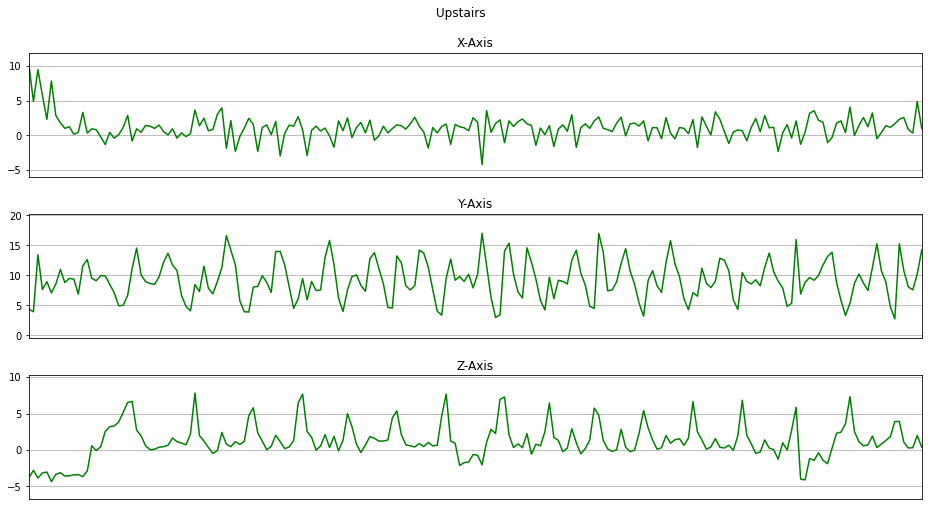

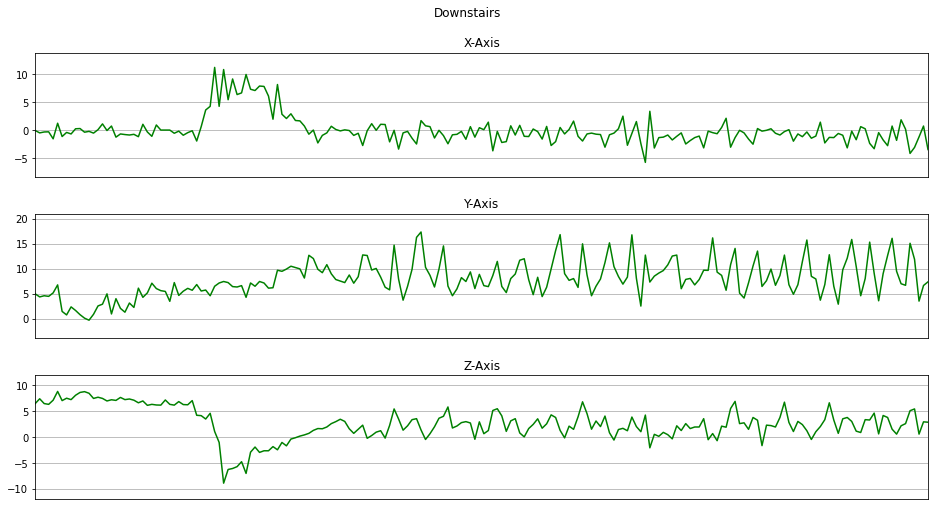

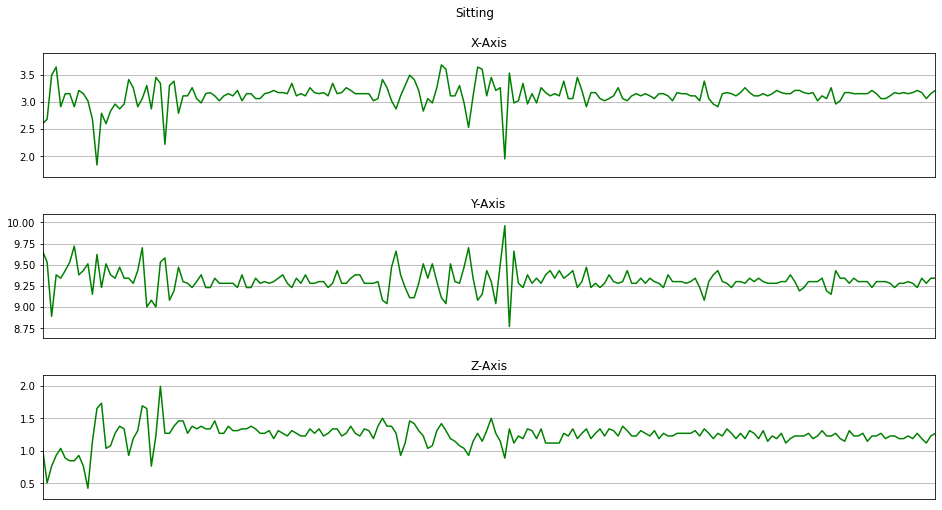

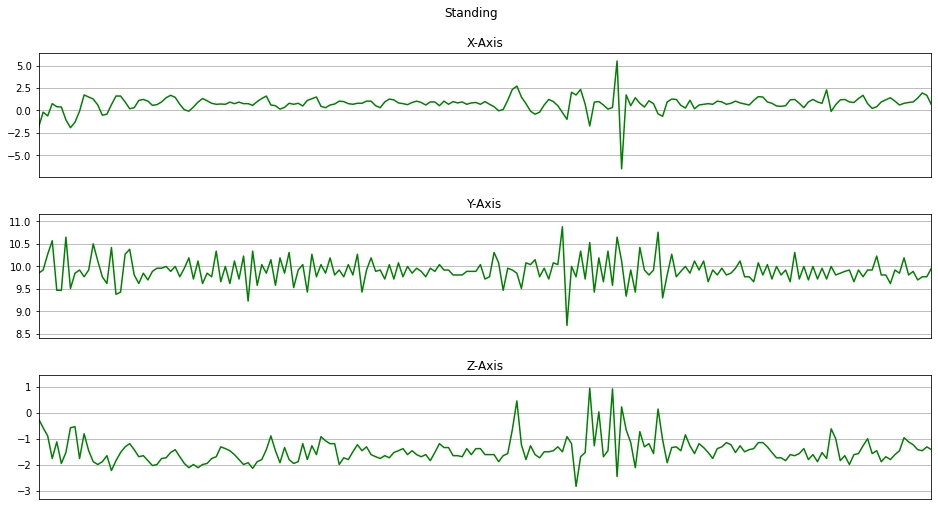

In [ ]:
def plot_activity(activity, data):
  fig, (ax0,ax1,ax2) = plt.subplots(nrows = 3, figsize=(16,8),sharex=True)
  plot_axis(ax0, data['time'],data['x'],'X-Axis')
  plot_axis(ax1, data['time'],data['y'],'Y-Axis')
  plot_axis(ax2, data['time'],data['z'],'Z-Axis')
  plt.subplots_adjust(hspace=0.3, top = 0.90)
  fig.suptitle(activity)
  plt.show()
FS=20
def plot_axis(ax,x,y,title):
  ax.plot(x,y,'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y)-np.std(y),max(y)+np.std(y)])
  ax.set_xlim([min(x), max(x)])
  ax.grid(True)

for activity in activities:
  dataplot= data[(data['activity']==activity)][:FS*10]
  plot_activity(activity, dataplot)

## Balance The Data

In [ ]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [ ]:
df = data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [ ]:
df['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

In [ ]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs = df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].head(3555).copy()

In [ ]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking, Jogging, Upstairs, Downstairs, Sitting, Standing])
balanced_data.shape

(21330, 4)

In [ ]:
balanced_data['activity'].value_counts()

Jogging       3555
Walking       3555
Downstairs    3555
Standing      3555
Sitting       3555
Upstairs      3555
Name: activity, dtype: int64

## Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label = LabelEncoder()
balanced_data['label']= label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [ ]:
# Standarized Data

In [ ]:
X = balanced_data[['x','y','z']]
y = balanced_data['label']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['x','y','z'])
scaled_X['label'] = y.values

scaled_X

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
...,...,...,...,...
21325,-0.470217,0.178084,0.261019,3
21326,-0.542658,0.193692,0.248875,3
21327,-0.628514,0.197593,0.261019,3
21328,-0.781444,0.049322,0.155768,3


## Frame Preparation

In [ ]:
import scipy.stats as stats

In [ ]:
Fs = 20
frame_size = Fs*4
hop_size = Fs*2

In [ ]:
def get_frames(df, frame_size, hop_size):
  N_FEATURES = 3
  frames = []
  labels = []
  for i in range(0, len(df)-frame_size, hop_size):
    x = df['x'].values[i: i+frame_size]
    y = df['y'].values[i: i+frame_size]
    z = df['z'].values[i: i+frame_size]

    label = stats.mode(df['label'][i:i+frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)

  frames = np.asarray(frames).reshape(-1, frame_size, N_FEATURES)
  labels = np.asarray(labels)

  return frames, labels

In [ ]:
X, y = get_frames(scaled_X, frame_size, hop_size)

In [ ]:
X.shape, y.shape

((532, 80, 3), (532,))

In [ ]:
(3555*6)/40

533.25

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

In [ ]:
X_train.shape, X_test.shape

((425, 80, 3), (107, 80, 3))

In [ ]:
X_train = X_train.reshape(425,80,3,1)
X_test = X_test.reshape(107,80,3,1)

## CNN Model (2D)

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16,(2,2), activation = 'relu',input_shape=(X_train[0].shape)),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Conv2D(32, (2,2), activation='relu'),
                             tf.keras.layers.Dropout(0.3),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dropout(0.6),
                             tf.keras.layers.Dense(6, activation='softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 79, 2, 16)         80        
_________________________________________________________________
dropout_6 (Dropout)          (None, 79, 2, 16)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 78, 1, 32)         2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 78, 1, 32)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2496)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               319616    
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)              

In [ ]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs = 100, validation_data=(X_test, y_test), verbose =1)

Epoch 1/100
14/14 [==============================] - 0s 13ms/step - loss: 0.0468 - accuracy: 0.9859 - val_loss: 0.2910 - val_accuracy: 0.8972
Epoch 2/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0564 - accuracy: 0.9765 - val_loss: 0.2678 - val_accuracy: 0.9346
Epoch 3/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0406 - accuracy: 0.9929 - val_loss: 0.2730 - val_accuracy: 0.9346
Epoch 4/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0412 - accuracy: 0.9882 - val_loss: 0.3029 - val_accuracy: 0.8972
Epoch 5/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0456 - accuracy: 0.9835 - val_loss: 0.3008 - val_accuracy: 0.9252
Epoch 6/100
14/14 [==============================] - 0s 12ms/step - loss: 0.0816 - accuracy: 0.9788 - val_loss: 0.3105 - val_accuracy: 0.9065
Epoch 7/100
14/14 [==============================] - 0s 11ms/step - loss: 0.0493 - accuracy: 0.9859 - val_loss: 0.2940 - val_accuracy: 0.9346
Epoch 

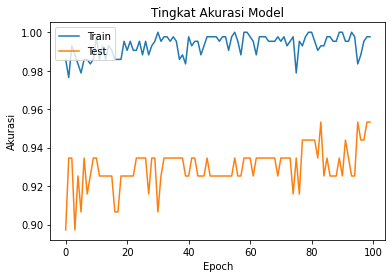

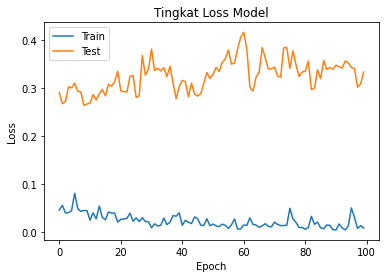

In [71]:
import matplotlib.pyplot as plt
# Melihat Tingkat Akurasi Model
plt.plot(history.history['accuracy'])    # Plotting learning(model fit) history untuk akurasi
plt.plot(history.history['val_accuracy'])# Plotting learning(model fit) history untuk validation akurasi
plt.title('Tingkat Akurasi Model')        # Set Judul Gambar
plt.ylabel('Akurasi')                     # Set Label y-axis
plt.xlabel('Epoch')                       # Set Label x-axis
plt.legend(['Train', 'Test'], loc='upper left') #memberikan legend Gambar untuk memudahkan membaca
plt.show()

# # Melihat Tingkat Loss Model
plt.plot(history.history['loss'])     # Plotting learning(model fit) history untuk Loss
plt.plot(history.history['val_loss']) # Plotting learning(model fit) history untuk validation Loss
plt.title('Tingkat Loss Model')       # Set Judul Gambar
plt.ylabel('Loss')                        # Set Label y-axis
plt.xlabel('Epoch')                       # Set Label x-axis
plt.legend(['Train', 'Test'], loc='upper left') #memberikan legend Gambar untuk memudahkan membaca
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

In [73]:
y_pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc4bc187588>)

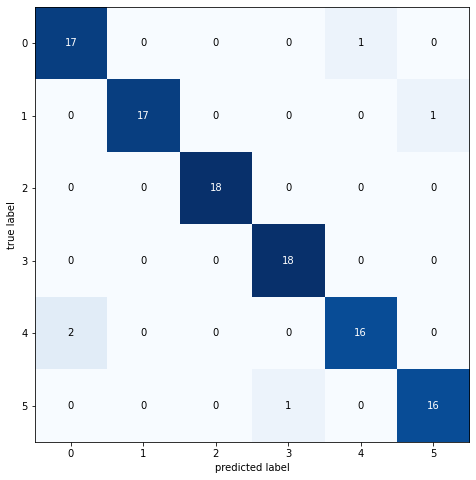

In [76]:
result = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(conf_mat = result, show_normed=False, figsize=(8,8),)

In [77]:
model.save_weights('model.h5')